# How to Visualize Your Decision Tree

In the previous workspace, you created a decision tree for the Titanic survival dataset. But what do you do if you want to inspect your tree visually, and make sure it makes logical sense? We'll look at how to do that in this workspace, using Graphviz open source graph visualization software. Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks.

We'll start by importing the same dataset, and taking the same steps we did earlier to split the data and train the tree.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Set a random seed
import random
random.seed(42)

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

In [2]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
features_raw = full_data.drop(['Survived'], axis = 1)

In [3]:
features = pd.get_dummies(features_raw)

In [4]:
features = features.fillna(0.0)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [6]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.810055865922


Now, let's install the graphviz package.

In [8]:
!pip install graphviz

Now we'll import some relevant modules.

In [11]:
from sklearn.tree import export_graphviz
from graphviz import Source

## (TODO) Display the Tree Graph
Now, use what you learned to export the graph in DOT format, and finally display it in the notebook.

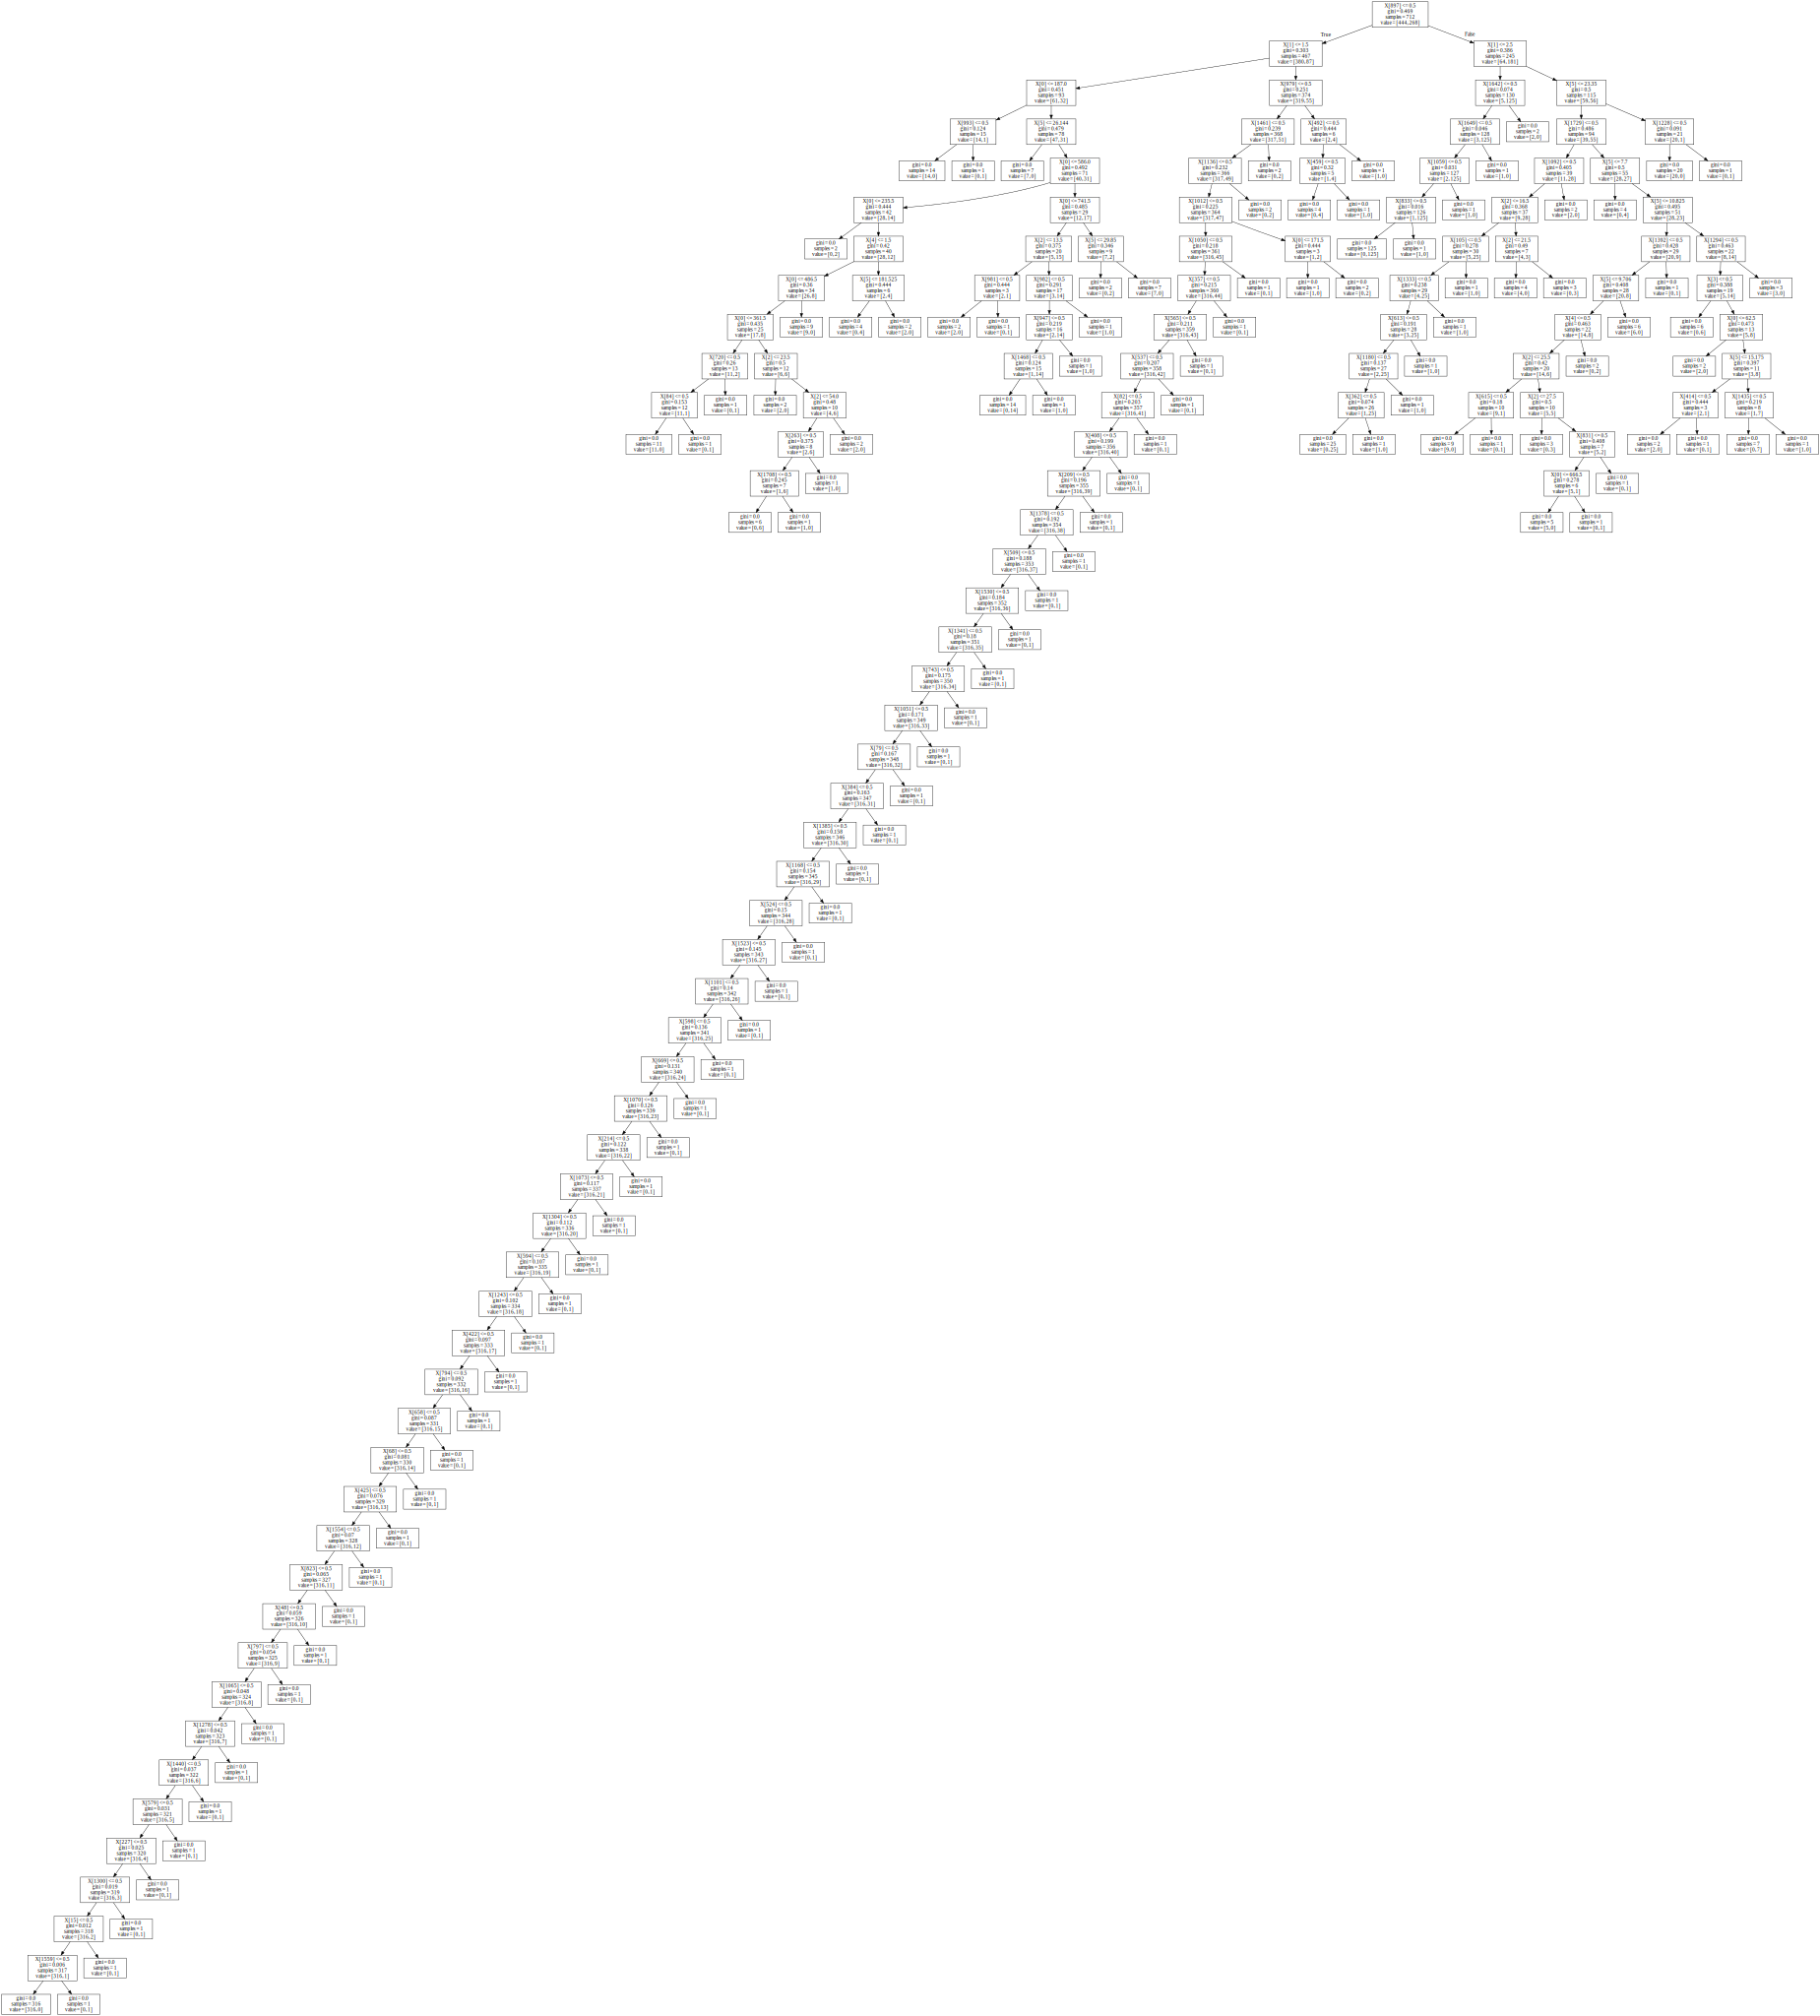

In [12]:
# TODO: Export the graph to DOT format
dot_data = export_graphviz(model, out_file=None)

# TODO: Use graphviz to create the graph
graph = Source(dot_data)

# TODO: Display the graph in the Jupyter notebook
graph

This displays a rather large and detailed graph that is nonetheless helpful for making apparent a few aspects of our tree. The tree has made splits on features that aren't very useful for characterizing groups of people—for example, it's made splits based on individual people's names, which basically split out a single person. Based on your inspection of this graph, you may decide to change some of the input features and hyperparameters of your tree.

In case you need help, be sure to check out the [solution notebook](titanic_graphviz_solution.ipynb).

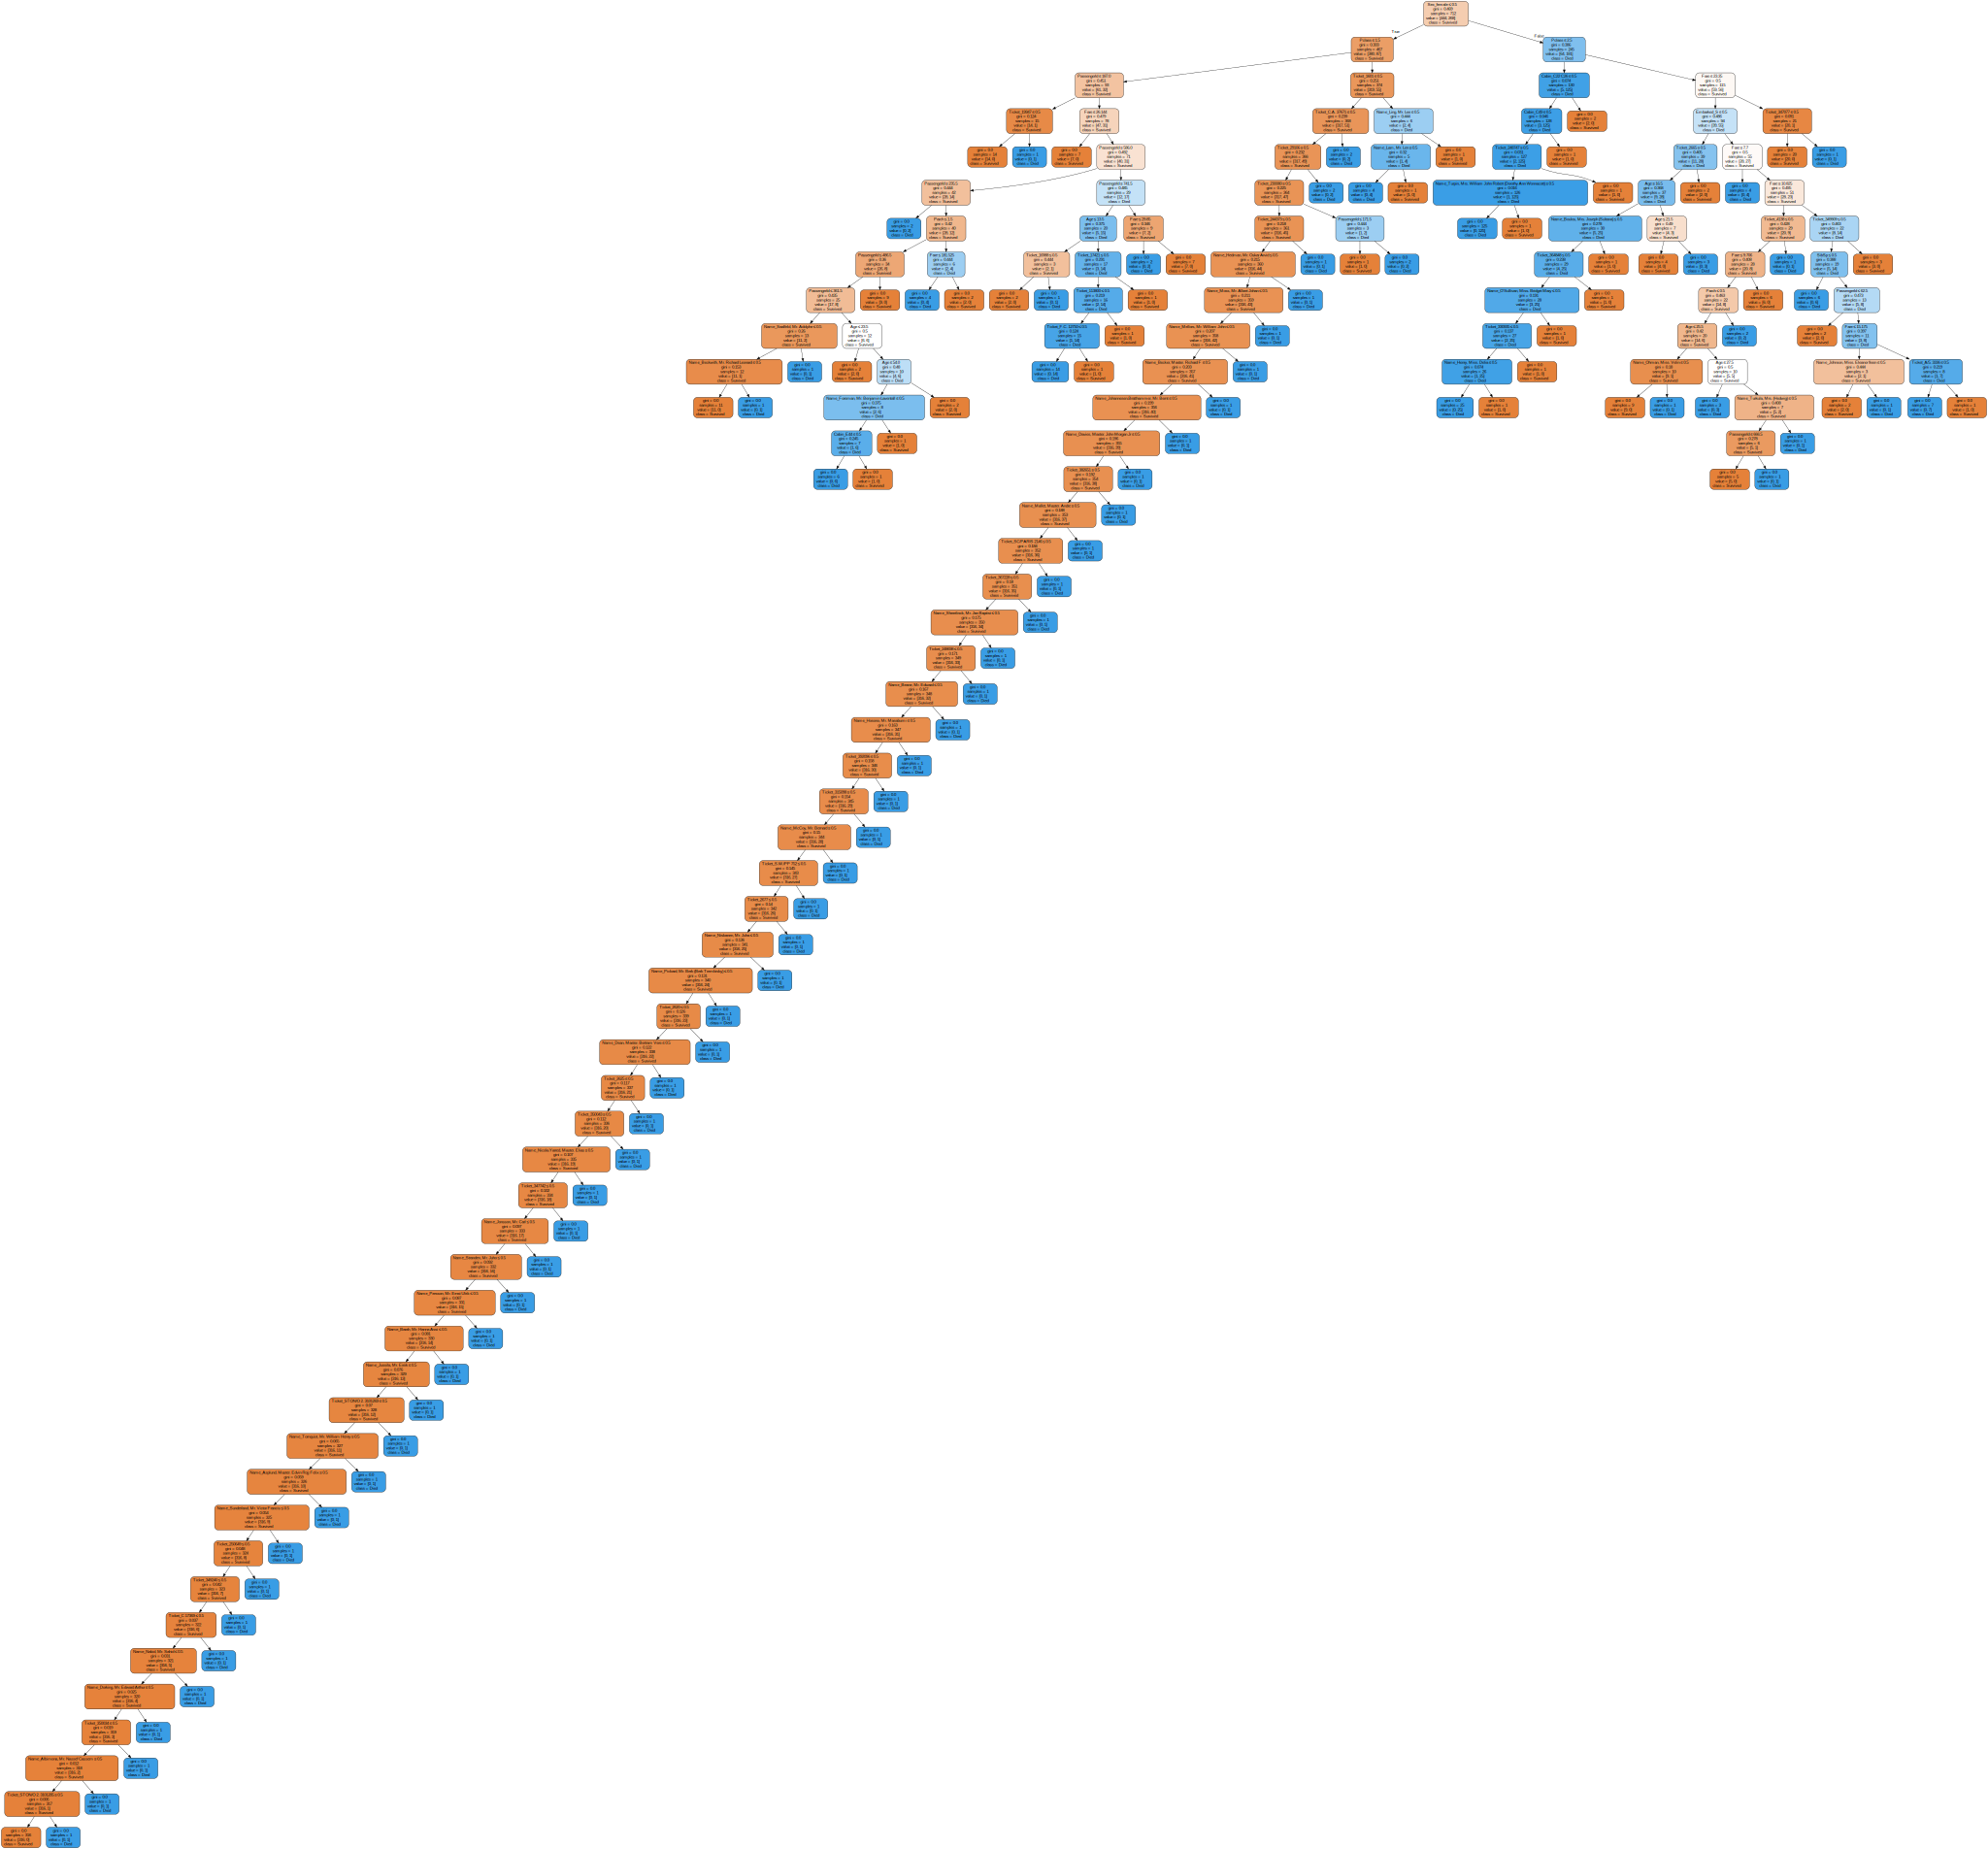

In [13]:
# Their solution

dot_data = export_graphviz(model, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['Survived', 'Died'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph